# MHCflurry project
## Wanqi Wang, Jun Hyek Jang, Hui Tan
### 12/17/2018

In [3]:
import mhcflurry
from mhcflurry import Class1AffinityPredictor

In [4]:
#load predictor 
predictor = Class1AffinityPredictor.load()
#view all supported alleles
predictor.supported_alleles[:]

['BoLA-6*13:01',
 'Eqca-1*01:01',
 'H-2-Db',
 'H-2-Dd',
 'H-2-Kb',
 'H-2-Kd',
 'H-2-Kk',
 'H-2-Ld',
 'HLA-A*01:01',
 'HLA-A*02:01',
 'HLA-A*02:02',
 'HLA-A*02:03',
 'HLA-A*02:05',
 'HLA-A*02:06',
 'HLA-A*02:07',
 'HLA-A*02:11',
 'HLA-A*02:12',
 'HLA-A*02:16',
 'HLA-A*02:17',
 'HLA-A*02:19',
 'HLA-A*02:50',
 'HLA-A*03:01',
 'HLA-A*11:01',
 'HLA-A*23:01',
 'HLA-A*24:02',
 'HLA-A*24:03',
 'HLA-A*25:01',
 'HLA-A*26:01',
 'HLA-A*26:02',
 'HLA-A*26:03',
 'HLA-A*29:02',
 'HLA-A*30:01',
 'HLA-A*30:02',
 'HLA-A*31:01',
 'HLA-A*32:01',
 'HLA-A*33:01',
 'HLA-A*66:01',
 'HLA-A*68:01',
 'HLA-A*68:02',
 'HLA-A*68:23',
 'HLA-A*69:01',
 'HLA-A*80:01',
 'HLA-B*07:01',
 'HLA-B*07:02',
 'HLA-B*08:01',
 'HLA-B*08:02',
 'HLA-B*08:03',
 'HLA-B*14:02',
 'HLA-B*15:01',
 'HLA-B*15:02',
 'HLA-B*15:03',
 'HLA-B*15:09',
 'HLA-B*15:17',
 'HLA-B*18:01',
 'HLA-B*27:02',
 'HLA-B*27:03',
 'HLA-B*27:04',
 'HLA-B*27:05',
 'HLA-B*27:06',
 'HLA-B*35:01',
 'HLA-B*35:03',
 'HLA-B*37:01',
 'HLA-B*38:01',
 'HLA-B*39:01',
 'HL

In [5]:
#we can generate some binding predictions for allele HLA-A0201
predictor.predict(allele="HLA-A0201", peptides=["SIINFEKL", "SIINFEQL"])

/Users/wangwanqi/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


array([4571.98373389, 3583.33113994])

In [6]:
#we can also predict across pairs
predictor.predict(alleles=["HLA-A*02:01", "HLA-B*57:01"], peptides=["SIINFEKL", "SIINFEQL"])

array([ 4571.98345747, 20648.92075372])

In [7]:
#download training data
from mhcflurry.downloads import get_path
data_path = get_path("data_curated", "curated_training_data.no_mass_spec.csv.bz2")
data_path

'/Users/wangwanqi/Library/Application Support/mhcflurry/4/1.2.0/data_curated/curated_training_data.no_mass_spec.csv.bz2'

In [8]:
import pandas
df = pandas.read_csv(data_path)
#restrict the length to 8~15 amino acids 
df = df.loc[(df.peptide.str.len() >= 8) & (df.peptide.str.len() <= 15)]
df

,allele,peptide,measurement_value,measurement_inequality,measurement_type,measurement_source,original_allele
0,BoLA-1*21:01,AENDTLVVSV,7817.0,=,quantitative,Barlow - purified MHC/competitive/fluorescence,BoLA-1*02101
1,BoLA-1*21:01,NQFNGGCLLV,1086.0,=,quantitative,Barlow - purified MHC/direct/fluorescence,BoLA-1*02101
2,BoLA-2*08:01,AAHCIHAEW,21.0,=,quantitative,Barlow - purified MHC/direct/fluorescence,BoLA-2*00801
3,BoLA-2*08:01,AAKHMSNTY,1299.0,=,quantitative,Barlow - purified MHC/direct/fluorescence,BoLA-2*00801
4,BoLA-2*08:01,DSYAYMRNGW,2.0,=,quantitative,Barlow - purified MHC/direct/fluorescence,BoLA-2*00801
5,BoLA-2*08:01,HTTNTQNNDW,40.0,=,quantitative,Barlow - purified MHC/direct/fluorescence,BoLA-2*00801
6,BoLA-2*08:01,KVYANIAPTY,10000.0,=,quantitative,Barlow - purified MHC/competitive/fluorescence,BoLA-2*00801
7,BoLA-2*08:01,KVYNPPRTNY,393.0,=,quantitative,Barlow - purified MHC/direct/fluorescence,BoLA-2*00801
8,BoLA-2*08:01,LAAKHMSNT,1380.0,=,quantitative,Barlow - purified MHC/direct/fluorescence,BoLA-2*00801
9,BoLA-2*08:01,LLVAMVPEW,2.0,=,quantitative,Barlow - purified MHC/direct/fluorescence,BoLA-2*00801


In [17]:
#split train and test set
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.25, random_state=42)

In [41]:
peptide_test = (df_test.peptide).astype(str).values.tolist()
peptide_test

['TFFIFNKLVK',
 'KLVAMGINAV',
 'LEKWNLGII',
 'EHYVRITGL',
 'THEANTMAM',
 'FLILCSVLL',
 'GLIIPPLGI',
 'FLPGQYMNI',
 'LMLLALIAVL',
 'VPLRPMTY',
 'SAIANLDVL',
 'GITGGHIPK',
 'YAYEPGSVM',
 'AEIAAVAKA',
 'YFNTHDVYF',
 'IVDYVTAYG',
 'FLKEEGGL',
 'LDKGKLWHL',
 'RRQDILDLWI',
 'FYGGWHNML',
 'WQEWERKVDF',
 'HFKKRFSTL',
 'EPAQEEHDKYH',
 'VIRHVDGKI',
 'KNDAVYIGY',
 'FVAAGAFHM',
 'HSKRKCDEL',
 'HRILDMYL',
 'IEDDEIIWV',
 'GIPHPAGLK',
 'SLSAYIIRVT',
 'FPVKPQVPL',
 'LTYRHKVVK',
 'SLTDRELLL',
 'KIEIERKKL',
 'RRTAAGIMK',
 'SAYYLDIGF',
 'ETLNEYKQL',
 'STTENAAYQV',
 'QIFNEDTSY',
 'DVNSVQFSIL',
 'VLAYMLFTK',
 'QLEVRSTEV',
 'SVIFYFISI',
 'MHGHGKHIL',
 'NQLLIAIL',
 'LICYQIEYI',
 'FQKDAKVLF',
 'RLGRLLNRI',
 'YMLSWGKEA',
 'LLGLWGLATA',
 'SEYKAAGYL',
 'IPRRIRQGL',
 'FEDQLLPFMS',
 'VVISKKDTY',
 'LSDENYLLK',
 'EYYFRNEVF',
 'AVEDFLAFF',
 'CLLSHTLAY',
 'LPLIVDTAA',
 'GIIITVGMLI',
 'STLSTQEAL',
 'GSNRPWVSF',
 'AVINTTCNY',
 'KVLFLAAFV',
 'IQDEIVAAY',
 'GLSASDVDM',
 'EIYRTLYGL',
 'TTEANAGQF',
 'TILKALGPA',
 'YFYYNAFHW

In [32]:
#Can train our own model (but won't use it since it doesn't perform as well)

#make an untrained Class1AffinityPredictor and then call fit_allele_specific_predictors to fit some models
#allele HLA-B*57:01
#allele HLA-A*02:01
new_predictor_1 = Class1AffinityPredictor()
single_allele_train_data = df_train.loc[df.allele == "HLA-A*02:01"].sample(10000)
new_predictor_1.fit_allele_specific_predictors(
   n_models=1,
   architecture_hyperparameters_list=[{
        "layer_sizes": [16],
         "max_epochs": 10,
         "random_negative_constant": 5,
    }],
    peptides=single_allele_train_data.peptide.values,
   affinities=single_allele_train_data.measurement_value.values,
  allele="HLA-A*02:01")

[ 10000 peptides ]  Epoch   0 /  10: loss=0.194643. Min val loss (None) at epoch None


In [82]:
df_train.loc[df.allele == "HLA-A*02:01"].size

128772

In [86]:
#try increase sample size
new_predictor_2 = Class1AffinityPredictor()
single_allele_train_data = df_train.loc[df.allele == "HLA-A*02:01"].sample(12000)
new_predictor_2.fit_allele_specific_predictors(
   n_models=1,
   architecture_hyperparameters_list=[{
        "layer_sizes": [16],
         "max_epochs": 10,
         "random_negative_constant": 5,
    }],
    peptides=single_allele_train_data.peptide.values,
   affinities=single_allele_train_data.measurement_value.values,
  allele="HLA-A*02:01")

[ 12000 peptides ]  Epoch   0 /  10: loss=0.180075. Min val loss (None) at epoch None


In [93]:
# or changing layer size & max_epochs
new_predictor_3 = Class1AffinityPredictor()
single_allele_train_data = df_train.loc[df.allele == "HLA-A*02:01"].sample(12000)
new_predictor_3.fit_allele_specific_predictors(
   n_models=1,
   architecture_hyperparameters_list=[{
        "layer_sizes": [16],
         "max_epochs": 20,
         "random_negative_constant": 5,
    }],
    peptides=single_allele_train_data.peptide.values,
   affinities=single_allele_train_data.measurement_value.values,
  allele="HLA-A*02:01")

[ 12000 peptides ]  Epoch   0 /  20: loss=0.19193. Min val loss (None) at epoch None
[ 12000 peptides ]  Epoch  11 /  20: loss=0.0386778. Min val loss (0.03988266090221975) at epoch 9


In [76]:
#make prediction

prediction_1 = []

for i in peptide_test:
    a = new_predictor_1.predict([i],allele="HLA-A*02:01")
    prediction_1.append(a)

In [88]:
prediction_2 = []

for i in peptide_test:
    a = new_predictor_2.predict([i],allele="HLA-A*02:01")
    prediction_2.append(a)

In [94]:
prediction_3 = []

for i in peptide_test:
    a = new_predictor_3.predict([i],allele="HLA-A*02:01")
    prediction_3.append(a)

In [77]:
prediction_MHCflurry =[]
for i in peptide_test:
    a = predictor.predict([i],allele="HLA-A*02:01")
    prediction_MHCflurry.append(a)

In [90]:
prediction_1_df = pd.DataFrame({'peptides':peptide_test,'binding_affinity': prediction_1})
prediction_2_df = pd.DataFrame({'peptides':peptide_test,'binding_affinity': prediction_2})
prediction_3_df = pd.DataFrame({'peptides':peptide_test,'binding_affinity': prediction_3})

prediction_1_df

,peptides,binding_affinity
0,TFFIFNKLVK,[14294.541746744912]
1,KLVAMGINAV,[91.68810735114995]
2,LEKWNLGII,[9158.656298704325]
3,EHYVRITGL,[10550.424309371096]
4,THEANTMAM,[10880.49536906348]
5,FLILCSVLL,[50.63483401489624]
6,GLIIPPLGI,[715.6080059701967]
7,FLPGQYMNI,[114.40942990350734]
8,LMLLALIAVL,[81.85087608637832]
9,VPLRPMTY,[19227.334572060987]


In [78]:
prediction_MHCflurry_df = pd.DataFrame({'peptides':peptide_test,'binding_affinity': prediction_MHCflurry})
prediction_MHCflurry_df

,peptides,binding_affinity
0,TFFIFNKLVK,[11539.175696335007]
1,KLVAMGINAV,[43.568866313742575]
2,LEKWNLGII,[17438.53191923649]
3,EHYVRITGL,[15960.728826890456]
4,THEANTMAM,[18232.055806139888]
5,FLILCSVLL,[20.30460244480764]
6,GLIIPPLGI,[1305.5570510855173]
7,FLPGQYMNI,[31.465033968585846]
8,LMLLALIAVL,[105.98947278943137]
9,VPLRPMTY,[23888.345131562404]


In [75]:
#evaluation performance with the new predictor trained  by looking at MSE
import sklearn
sklearn.metrics.mean_squared_error(df_test.measurement_value.astype('float'),
                                   prediction_1_df.binding_affinity.astype('float'),sample_weight=None)

6013664685.379406

In [91]:
sklearn.metrics.mean_squared_error(df_test.measurement_value.astype('float'),
                                   prediction_2_df.binding_affinity.astype('float'),sample_weight=None)

6009634490.79943

In [92]:
sklearn.metrics.mean_squared_error(df_test.measurement_value.astype('float'),
                                   prediction_3_df.binding_affinity.astype('float'),sample_weight=None)

6012238787.3011265

In [79]:
sklearn.metrics.mean_squared_error(df_test.measurement_value.astype('float'),
                                   prediction_MHCflurry_df.binding_affinity.astype('float'),sample_weight=None)

5960497860.6924095

All of the three self-trained predictors have MSEs higher than the pre-trained model, and since the pre-trained model already supported all alleles while self-trained model can only do one allele at a time, we decided to use the pretrained predictor but not the self-trained ones. 

In [97]:
#nectin: VLVPPLPSL
#Reference:Lopez, Marc, et al. "Identification of a naturally processed HLA-A* 02: 01-restricted CTL epitope
#from the human tumor-associated antigen Nectin-4." Cancer Immunology, Immunotherapy 65.10 (2016): 1177-1188.
alleles_nectin = predictor.predict(peptides=['VLVPPLPSL'] * 112, alleles = predictor.supported_alleles)
 
result_nectin_df = pd.DataFrame({'alleles':predictor.supported_alleles,'binding_affinity': alleles_nectin})

result_nectin_df.sort_values(by = 'binding_affinity', ascending = True)


,alleles,binding_affinity
13,HLA-A*02:06,14.173017
11,HLA-A*02:03,30.644539
16,HLA-A*02:12,41.182976
17,HLA-A*02:16,61.243598
10,HLA-A*02:02,70.003945
15,HLA-A*02:11,85.192956
9,HLA-A*02:01,124.974204
20,HLA-A*02:50,127.375161
18,HLA-A*02:17,136.667705
19,HLA-A*02:19,178.124000


In [121]:
str.split?

In [132]:
result_nectin_df['general_allele'] = result_nectin_df.alleles.str.split(":", expand = True)[0]
result_nectin_df
result_nectin_df.drop(['general allele'], axis=1)

,alleles,binding_affinity,general_allele
0,BoLA-6*13:01,5007.518118,BoLA-6*13
1,Eqca-1*01:01,6071.511838,Eqca-1*01
2,H-2-Db,20994.979860,H-2-Db
3,H-2-Dd,5094.131118,H-2-Dd
4,H-2-Kb,880.994422,H-2-Kb
5,H-2-Kd,16086.036989,H-2-Kd
6,H-2-Kk,2790.082703,H-2-Kk
7,H-2-Ld,7821.872532,H-2-Ld
8,HLA-A*01:01,24102.105445,HLA-A*01
9,HLA-A*02:01,124.974204,HLA-A*02


/Users/wangwanqi/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
/Users/wangwanqi/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


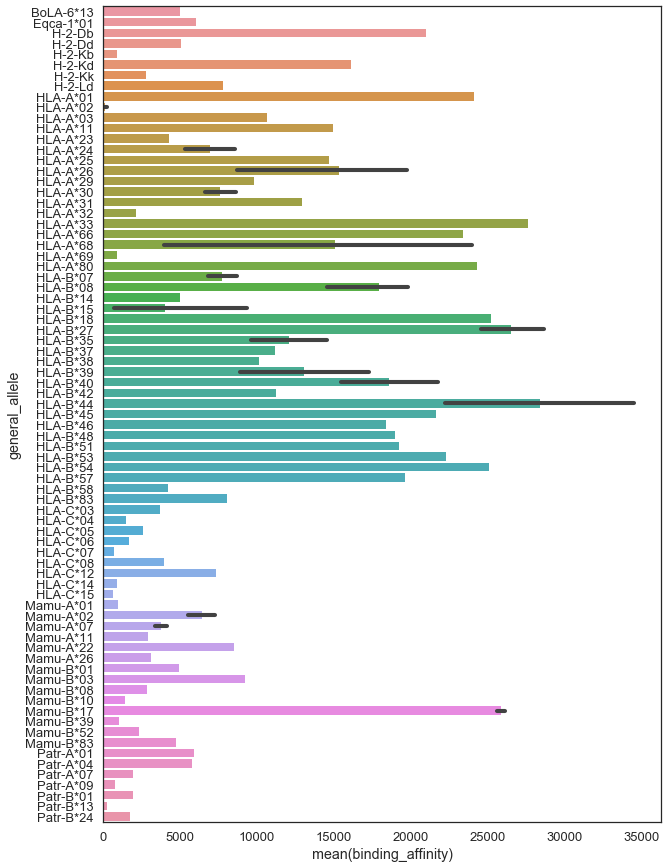

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = [10, 15])
sns.set(style="white", context="talk")
sns.barplot(y=result_nectin_df.general_allele, x=result_nectin_df.binding_affinity)
plt.show()

Nectins are families of cellular adhesion molecules involved in Ca2+-independent cellular adhesion.Nectins are ubiquitously expressed and have adhesive roles in a wide range of tissues such as the adherens junction of epithelia or the chemical synapse of the neuronal tissue.
From this, we can see that top 10 alleles that have high binding affinity with nectin are all on HLA-A*02, which is consistent with the previous study.

# Application

Tumor antigen is an antigenic substance produced in tumor cells and can trigger immune response in the host through the MHC complex. We explored the MHC1 binding affinity of a subset of tumor antigens from a database of missense mutation-derived peptides, and see if any minor change to the protein sequence could increase the binding affinity that might be potentially useful for cancer immunotherapy. 


(Reference: Khalili, Jahan S., Russell W. Hanson, and Zoltan Szallasi. "In silico prediction of tumor antigens derived from functional missense mutations of the cancer gene census." Oncoimmunology 1.8 (2012): 1281-1289.)

In [155]:
#a database of missense mutation-derived peptides, try it on HLA-A*02:01
import pandas as pd

#wildtype peptide
cancer_wt = ['FRVALEYI','FHFVSYVPI','GKWHGDVAV','TPVDLWSV','RPAVCAAV','VMASVDNPH','RPARFLSSL','SVMNVPDFD',
            'FVQEIGSG','FLPSGSLKE','HMNQMVFHK','CLLDILDTAGQ','KRAAEGWAA','FPWILNVL','AMDDLMLSP']
result_wt = []

for i in cancer_wt:
    a = predictor.predict([i],allele="HLA-A*02:01")
    result_wt.append(a)
    
#result_wt_df = pd.DataFrame({'peptides':cancer_wt,'binding_affinity':result_wt})

result_wt_df

#tight binding: <50

,peptides,binding_affinity,type
0,FRVALEYI,[3077.7720349454894],wt
1,FHFVSYVPI,[4479.254670965655],wt
2,GKWHGDVAV,[3856.2192364747552],wt
3,TPVDLWSV,[5175.078715502678],wt
4,RPAVCAAV,[15058.383307072143],wt
5,VMASVDNPH,[11447.72368443464],wt
6,RPARFLSSL,[11138.880365795816],wt
7,SVMNVPDFD,[11554.378727249521],wt
8,FVQEIGSG,[10285.586040651444],wt
9,FLPSGSLKE,[6272.539768448028],wt


from binding_affinity, we know that none of the peptides bind to the HLA-A*02:01 allele

In [141]:
#change one amino acid in the sequence and find the one with the highest binding affinity 
protein = ["A","R","N","D","E","C","Q","G","H","I","L","K","M","F","P","S","T",
          "W","Y","V"]
result_idx =0
for mut in cancer_wt:
    for pro in protein:
        idx = 0
        mut_list = list(mut)
        mut_list[idx] = pro
        mut_list = "".join(mut_list)
        #print(mut_list)
        aff_dummy = predictor.predict([mut_list],allele="HLA-A*02:01")
        #print(aff_dummy)
        if aff_dummy < result_mt_df['binding_affinity'][result_idx]:
            result_mt_df['peptides'][result_idx] = mut_list
            result_mt_df['binding_affinity'][result_idx] = aff_dummy
           
        idx = idx+1
    result_idx = result_idx +1

result_mt_df
mt_peptides = result_mt_df.peptides

In [139]:
result_mt_df['type'] = ['mut'] * 15
result_wt_df['type'] = ['wt'] * 15

result_combined = pd.concat([result_mt_df,result_wt_df])
result_combined['binding_affinity'] = result_combined['binding_affinity'].astype('float')
result_combined

,peptides,binding_affinity,type
0,FQVALEYI,114.015776,mut
1,FQFVSYVPI,85.305190,mut
2,GMWHGDVAV,14.743526,mut
3,TLVDLWSV,6.412467,mut
4,RLAVCAAV,101.319909,mut
5,VMASVDNPL,155.640078,mut
6,RLARFLSSL,31.131229,mut
7,SVMNVPDFV,49.788575,mut
8,FVQEIGSV,233.045158,mut
9,FLPSGSLKV,35.186984,mut


In [59]:
#see if the binding_affinity difference is significant 
import scipy
from scipy import stats
scipy.stats.ttest_ind(result_wt_df.binding_affinity,result_mt_df.binding_affinity)

Ttest_indResult(statistic=array([8.08388204]), pvalue=array([8.40576741e-09]))

/Users/wangwanqi/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


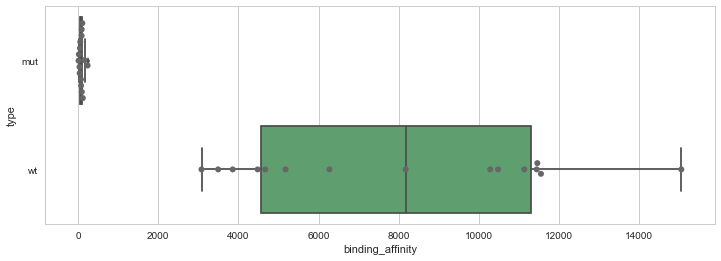

In [116]:
#plot before and after mutation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

plt.figure(figsize = (12, 4))
sns.boxplot(y="type", x="binding_affinity", data=result_combined)
sns.swarmplot(x="binding_affinity", y="type", data=result_combined,
              size=6, color="0.4", linewidth=0)
plt.show()

Next, we want to explore the binding affinity of some TP53 protein derived peptides across all supported alleles to see which ones have stronger binding

In [64]:
#TP53 protein derived peptides: STPPPGTRV, KTCPVQLWV, YQGSYGFRL
#Reference: Petersen, T. R., et al. "Identification and design of p53‐derived HLA‐A2‐binding peptides with
#increased CTL immunogenicity." Scandinavian journal of immunology 53.4 (2001): 357-364.

alleles1 = predictor.predict(peptides=['STPPPGTRV'] * 112, alleles = predictor.supported_alleles)
 
result_alleles1_df = pd.DataFrame({'alleles':predictor.supported_alleles,'binding_affinity': alleles1})

result_alleles1_df.sort_values(by = 'binding_affinity', ascending = True)
#strong binding: Mamu-A*01:01 and HLA-A*68:02

,alleles,binding_affinity
88,Mamu-A*01:01,3.542158
38,HLA-A*68:02,20.429983
40,HLA-A*69:01,357.632391
109,Patr-B*01:01,678.619814
11,HLA-A*02:03,1474.058537
80,HLA-C*04:01,1895.908152
110,Patr-B*13:01,1926.905433
86,HLA-C*14:02,1951.657287
81,HLA-C*05:01,1983.688676
87,HLA-C*15:02,2700.197544


In [66]:
alleles2 = predictor.predict(peptides=['KTCPVQLWV'] * 112, alleles = predictor.supported_alleles)
 
result_alleles2_df = pd.DataFrame({'alleles':predictor.supported_alleles,'binding_affinity': alleles2})

result_alleles2_df.sort_values(by = 'binding_affinity', ascending = True)

#Strong binding: 

,alleles,binding_affinity
77,HLA-B*58:01,20.167285
13,HLA-A*02:06,23.306240
52,HLA-B*15:17,85.793085
31,HLA-A*30:01,132.377949
89,Mamu-A*02:01,274.848914
15,HLA-A*02:11,327.693013
17,HLA-A*02:16,461.974255
11,HLA-A*02:03,526.918300
38,HLA-A*68:02,662.631651
76,HLA-B*57:01,737.479337


In [67]:
alleles3 = predictor.predict(peptides=['YQGSYGFRL'] * 112, alleles = predictor.supported_alleles)
 
result_alleles3_df = pd.DataFrame({'alleles':predictor.supported_alleles,'binding_affinity': alleles3})

result_alleles3_df.sort_values(by = 'binding_affinity', ascending = True)

,alleles,binding_affinity
15,HLA-A*02:11,48.384454
93,Mamu-A*11:01,52.696481
17,HLA-A*02:16,55.227832
13,HLA-A*02:06,63.788146
16,HLA-A*02:12,111.000724
18,HLA-A*02:17,170.286097
14,HLA-A*02:07,172.000014
10,HLA-A*02:02,198.637946
9,HLA-A*02:01,219.644092
63,HLA-B*39:01,420.545009


We can repeat the previously done analysis of cancer antigens with the identified alleles. use Mamu-A*01:01 for example.

In [147]:
result_wt = []   
for i in cancer_wt:
    a = predictor.predict([i],allele="Mamu-A*01:01")
    result_wt.append(a)
result_wt_MamuA0101 = pd.DataFrame({'peptides':cancer_wt,'binding_affinity':result_wt})

result_wt_MamuA0101

,peptides,binding_affinity
0,FRVALEYI,[20880.505007316264]
1,FHFVSYVPI,[11003.528776797528]
2,GKWHGDVAV,[35869.463671981044]
3,TPVDLWSV,[16219.164391482323]
4,RPAVCAAV,[16124.637380880173]
5,VMASVDNPH,[35067.981478883434]
6,RPARFLSSL,[2619.164465790083]
7,SVMNVPDFD,[24944.569571894157]
8,FVQEIGSG,[32889.5520479671]
9,FLPSGSLKE,[14756.237936651542]


In [157]:
result_mt = []   
for i in mt_peptides:
    a = predictor.predict([i],allele="Mamu-A*01:01")
    result_mt.append(a)
result_mt_MamuA0101 = pd.DataFrame({'peptides':mt_peptides,'binding_affinity':result_mt})

result_mt_MamuA0101

,peptides,binding_affinity
0,FQVALEYI,[12654.208004482545]
1,FQFVSYVPI,[8980.76016272551]
2,GMWHGDVAV,[29607.81056737335]
3,TLVDLWSV,[20444.773036375158]
4,RLAVCAAV,[22028.831598936587]
5,VMASVDNPL,[10727.66177061063]
6,RLARFLSSL,[2973.8195822839557]
7,SVMNVPDFV,[16134.492315945741]
8,FVQEIGSV,[25104.703196117658]
9,FLPSGSLKV,[956.467004627977]


In [149]:
scipy.stats.ttest_ind(result_wt_MamuA0101.binding_affinity,result_mt_MamuA0101.binding_affinity)

Ttest_indResult(statistic=array([2.18491358]), pvalue=array([0.03742489]))

Although p<0.05, the result doesn't seem to be biologically significant since none of the 15 peptides have binding affinity smaller than 500nM after mutation.

In [149]:
#more specifically, use only TP53 derived peptides
tp53_wt = ['STPPPGTRV','KTCPVQLWV','YQGSYGFRL']
tp53_mt = ['SLPPPGTRV','KLCPVQLWV','YLGSYGFRL']
result_tp53_wt = []
result_tp53_mt = []

for i in tp53_wt:
    a = predictor.predict([i],allele="Mamu-A*01:01")
    result_tp53_wt.append(a)
    
result_tp53_wt_df = pd.DataFrame({'wild-type peptides':tp53_wt,'binding_affinity':result_tp53_wt})  
result_tp53_wt_df   

,wild-type peptides,binding_affinity
0,STPPPGTRV,[3.5421577608524637]
1,KTCPVQLWV,[1765.4777663649886]
2,YQGSYGFRL,[3703.0444847472513]


In [150]:
for i in tp53_mt:
    a = predictor.predict([i],allele="Mamu-A*01:01")
    result_tp53_mt.append(a)
    
result_tp53_mt_df = pd.DataFrame({'mutated peptides':tp53_mt,'binding_affinity':result_tp53_mt})  
result_tp53_mt_df 

,mutated peptides,binding_affinity
0,SLPPPGTRV,[370.1737946176919]
1,KLCPVQLWV,[17943.636977555016]
2,YLGSYGFRL,[1241.9651517281598]


In [148]:
#if look at the HLA-A*02:11 allele
result_tp53_wt = []
result_tp53_mt = []

for i in tp53_wt:
    a = predictor.predict([i],allele="HLA-A*02:11")
    result_tp53_wt.append(a)
for i in tp53_mt:
    a = predictor.predict([i],allele="HLA-A*02:11")
    result_tp53_mt.append(a)
    
    
result_tp53_wt_df = pd.DataFrame({'wild-type peptides':tp53_wt,'binding_affinity':result_tp53_wt})
result_tp53_mt_df = pd.DataFrame({'mutated peptides':tp53_mt,'binding_affinity':result_tp53_mt})
print (result_tp53_wt_df)
print (result_tp53_mt_df) 

  wild-type peptides      binding_affinity
0          STPPPGTRV   [6511.711746987212]
1          KTCPVQLWV   [327.6930130009875]
2          YQGSYGFRL  [48.384454232348844]
  mutated peptides      binding_affinity
0        SLPPPGTRV   [161.9432696379276]
1        KLCPVQLWV    [14.5672006306042]
2        YLGSYGFRL  [3.4582817547526115]


In [147]:
#HLA-B*58:01 allele 
result_tp53_wt = []
result_tp53_mt = []

for i in tp53_wt:
    a = predictor.predict([i],allele="HLA-B*58:01")
    result_tp53_wt.append(a)
for i in tp53_mt:
    a = predictor.predict([i],allele="HLA-B*58:01")
    result_tp53_mt.append(a)
    
    
result_tp53_wt_df = pd.DataFrame({'wild-type peptides':tp53_wt,'binding_affinity':result_tp53_wt})
result_tp53_mt_df = pd.DataFrame({'mutated peptides':tp53_mt,'binding_affinity':result_tp53_mt})
print (result_tp53_wt_df)
print (result_tp53_mt_df)

  wild-type peptides      binding_affinity
0          STPPPGTRV   [17148.68947745565]
1          KTCPVQLWV  [20.167284815709316]
2          YQGSYGFRL  [11635.765941566502]
  mutated peptides      binding_affinity
0        SLPPPGTRV   [23404.14247181318]
1        KLCPVQLWV  [219.75992222626243]
2        YLGSYGFRL   [6904.755599723606]


The change in the second amino acid in those three TP53-derived peptides decrease their binding affinity to Mamu-A*01:01 and HLA-B*58:01 but greatly increase their binding affinity to the HLA-A*02:11 allele.
From this, we can know that the binding affinity is highly allele specific. 